This is my approach to linear regression problem. 

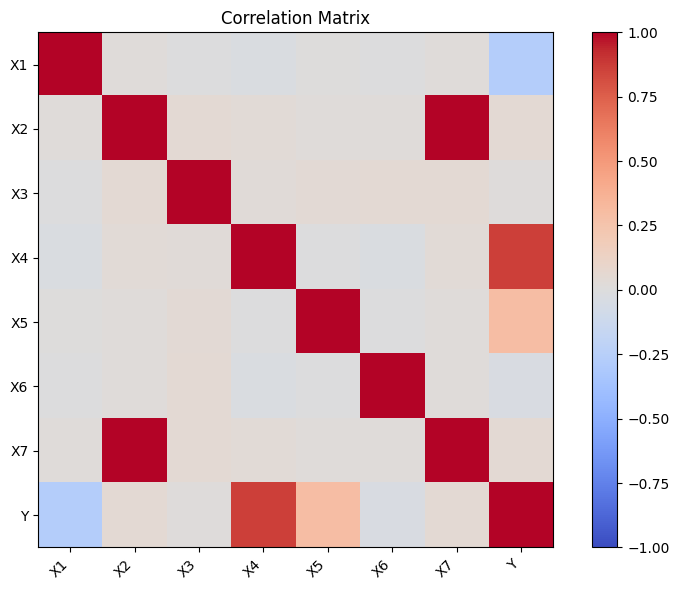

In [12]:
import numpy as np
from linear_regression import filename, LinearRegressionModel, StopCondition, RidgeRegressionFunction, Uninomial, \
    QuadraticLossFunction, Linear, LassoRegressionFunction, Zeros, Custom, Gaussian, ElasticNetworkLossFunction

model = LinearRegressionModel(filename, True)
model.split_data(0.6, 0.2, True)
model.corr()

In [13]:
a, b = model.estimate_coef(0.0025)
print(a, b)
assert a >= 0 and b >= 0
model.set_parameters(loss_function=ElasticNetworkLossFunction(a, b), base_function=Linear())
model.set_parameters(eta=0.0025, stop=0.5, rep_count=10000, condition=StopCondition.Both)
model.set_parameters(mini_batch=True   , batch_size=64, print_c=200)
model.set_parameters(split = False, fraction=0.125)
model.linear_regression()

0.0001 0.5
200: Gradient: 1535.813306611768, MSE: 266508.1959605713
400: Gradient: 1406.5255552635033, MSE: 102288.6686852665
600: Gradient: 3232.8090914860236, MSE: 69345.38796757239
800: Gradient: 812.7062712745892, MSE: 56565.502521647264
1000: Gradient: 1003.5101009074302, MSE: 49240.40553495659
1200: Gradient: 1881.6975584076733, MSE: 48173.652569048136
1400: Gradient: 1637.2410613459122, MSE: 45716.23485548013
1600: Gradient: 968.8284116336262, MSE: 43831.76161094537
1800: Gradient: 569.8326772536649, MSE: 44803.55468178722
2000: Gradient: 205.48311823541042, MSE: 41903.79181348062
2200: Gradient: 998.1041599939742, MSE: 41760.12287009819
2400: Gradient: 1850.3054301144673, MSE: 40353.2325463881
2600: Gradient: 684.8684604415436, MSE: 40182.417572609964
2800: Gradient: 795.3645167586249, MSE: 39278.84433427839
3000: Gradient: 783.7212986496048, MSE: 38774.87560421581
3200: Gradient: 207.80139921182953, MSE: 39068.81111245511
3400: Gradient: 755.9934045129702, MSE: 37299.531399291

[np.float64(965.3358859494482),
 np.float64(-7.977724242882141),
 np.float64(2.958580341985901),
 np.float64(-21.203288552914763),
 np.float64(681.5372778034498),
 np.float64(682.604326034652),
 np.float64(-5.647509182233019),
 np.float64(0.051864780846474966)]

In [7]:
from random import randrange
i = randrange(0, len(model.test) - 1, 1)
p = model.prediction([1, *[model.test[i][j] for j in range(len(model.test[0]) - 1)]])
a = model.test[i][-1]
np.set_printoptions(precision=2)
print(f"prediction: {"%0.2f" %  p}. actual: {"%0.2f" %  a}, error = {"%0.2f" % (abs(p - a) / a * 100)}%")

prediction: 1106.41. actual: 1369.77, error = 19.23%


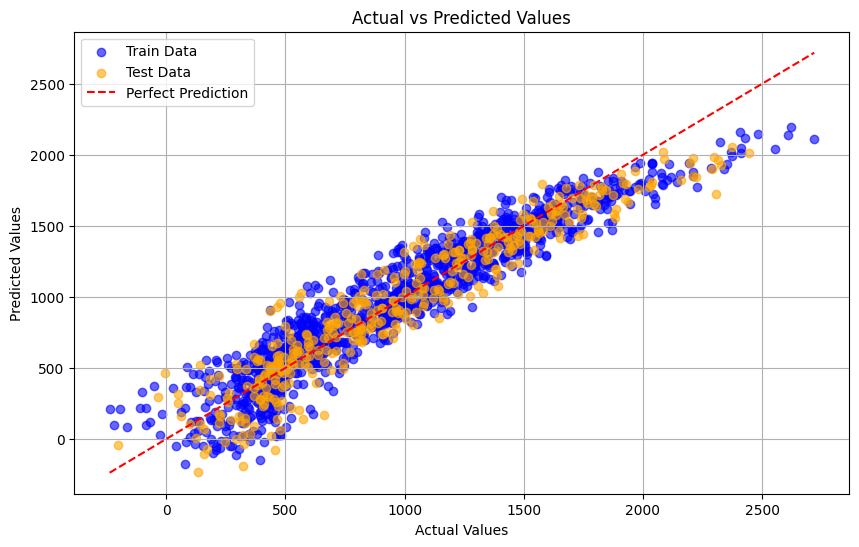

Train Set MSE: 29162.203772201992
Test Set MSE: 31245.518107176114


In [20]:
model.print_results()
model.results()

In [19]:
model.solve_analytically(0.0001)
print(model.theta)

[ 9.67e+02 -8.90e+00  2.18e+00 -2.68e+01  6.84e+02  8.21e+02 -3.44e+00
  1.94e-01]


In [ ]:
#print(np.mean([quadratic_loss(model, train[i]) ** 2 for i in range(len(train))]))
# print(linear_regression.quadratic_loss(model, test[0]))